# Demostrating Epistasis Models 

In [1]:
import numpy as np
from epistasis.utils import enumerate_space


Build a toy binary genotype-phenotype map, between two sequences, for the following example. The errors around each phenotype is 5%.

In [2]:
seq1 = 'AAAAA'
seq2 = 'VVVVV'
genotypes, binary = enumerate_space(seq1,seq2)
phenotypes = np.random.rand(len(genotypes))
errors = phenotypes*0.05

## The LocalEpistasisMap object

In [3]:
from epistasis.models import LocalEpistasisModel

The `LocalEpistasisMap` object can be used to estimate epistasis in a genotype-phenotype map using the biochemical interpretation (through mutant cycles) described in this paper to the order of **highest possible interaction**.

Begin by creating an instance of the `LocalEpistasisMap` and populating it with a wildtype (reference), genotypes, phenotypes, and phenotype errors. 

In [4]:
epistasis = LocalEpistasisModel(seq1, genotypes, phenotypes, errors=errors, log_transform=True)

The epistasis hasn't been estimated yet; the map has just been created. The following method estimates all interactions epistasis.

In [5]:
epistasis.fit()
epistasis.fit_error()
print(epistasis.Interactions.values)
print(epistasis.get_map("Interactions.keys", "Interactions.values"))

[-0.14837379 -1.45816083 -0.14735254 -0.41078736 -0.2162664  -0.07476827
  0.38385173  1.96076377  1.82135528  1.55732609  0.28676751  0.24793593
  0.11814126  0.34011699  0.58576974  0.34845669 -0.74550275 -0.82446955
 -0.23736476 -2.71979515 -3.21416637 -1.88631666  0.04090275 -0.59099473
 -0.49180932 -0.78750927  1.19814459  1.87739403  0.88527578  4.23431273
  0.61962825 -3.30361721]
{'0,1,2,4': 1.8773940330467218, '1,2,3,4': 0.61962825395137178, '1,2,3': 0.040902748147008783, '0,2,3,4': 4.2343127271189047, '1,4': 0.11814126067197026, '0,1,2': -0.74550275017060297, '3': -0.21626640023924829, '1': -0.14735254050838129, '0': -1.4581608338452137, '0,4': 1.5573260864470631, '0,3': 1.8213552808566591, '3,4': 0.34845668720043155, '0,2,4': -3.2141663654061392, '0,1,4': -0.23736475625800701, '0,2,3': -2.7197951542490095, '1,2': 0.28676751110843529, '0,3,4': -1.8863166611675528, '2,3,4': -0.78750926588770265, '0,1': 0.38385172702226145, '1,2,4': -0.59099472507298456, '0,1,3,4': 0.8852757771

In [6]:
print(epistasis.Interactions.errors)
print(epistasis.get_map("genotypes", "errors"))

[[ 0.03292995  0.04656998  0.04656998  0.04656998  0.04656998  0.04656998
   0.06585989  0.06585989  0.06585989  0.06585989  0.06585989  0.06585989
   0.06585989  0.06585989  0.06585989  0.06585989  0.09313995  0.09313995
   0.09313995  0.09313995  0.09313995  0.09313995  0.09313995  0.09313995
   0.09313995  0.09313995  0.13171978  0.13171978  0.13171978  0.13171978
   0.13171978  0.1862799 ]
 [ 0.03292995  0.04656998  0.04656998  0.04656998  0.04656998  0.04656998
   0.06585989  0.06585989  0.06585989  0.06585989  0.06585989  0.06585989
   0.06585989  0.06585989  0.06585989  0.06585989  0.09313995  0.09313995
   0.09313995  0.09313995  0.09313995  0.09313995  0.09313995  0.09313995
   0.09313995  0.09313995  0.13171978  0.13171978  0.13171978  0.13171978
   0.13171978  0.1862799 ]]
{'AAAAV': array([ 0.03292995,  0.03292995,  0.03292995,  0.03292995,  0.03292995,
        0.03292995,  0.03292995,  0.03292995,  0.03292995,  0.03292995,
        0.03292995,  0.03292995,  0.03292995,  0.03

## Plotting the output from Epistasis Models 

The `epistasis` package has build-in matplotlib plotting functions. This demostrates one of the methods.

In [7]:
%matplotlib inline
from epistasis.plotting import epistasis_bar

(<matplotlib.figure.Figure at 0x1097121d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a8e6080>)

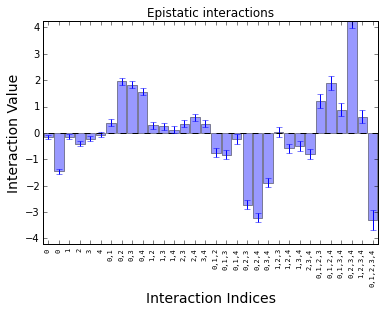

In [8]:
epistasis_bar(epistasis, sigmas=2)

# Other Epistasis Models

Three different models for estimating epistasis in a genotype-phenotype map are included in the epistasis package. We've already seen the *local epistasis model*. Let's see the other types:

## GlobalEpistasisMap

In [9]:
from epistasis.models import GlobalEpistasisModel

The *global epistasis map* uses a Discrete Fourier Transformation of the mutation map, and determines the global average of phenotypes for the reference state. Epistatic interactions are deviations from the additive (or multiplicative) model from this reference state.

(<matplotlib.figure.Figure at 0x10a806c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10adcfc18>)

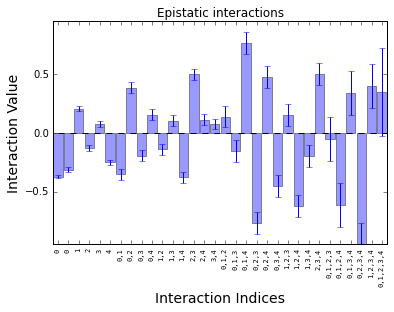

In [10]:
epistasis = GlobalEpistasisModel(seq1, genotypes, phenotypes, errors=errors, log_transform=True)
epistasis.fit()
epistasis.fit_error()
epistasis_bar(epistasis, sigmas=2)

## ProjectedEpistasisMap

In [11]:
from epistasis.models import ProjectedEpistasisModel

The *projected epistasis map* is the same model as the local epistasis map; however, it attempts to estimate lower order interactions from a high ordered space, using a lower order (any order, actually) model. This is useful for modeling very large spaces that might be too large for a full-order fit. The first argument is the order of the fit. 

(<matplotlib.figure.Figure at 0x10b0d6240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b0d4908>)

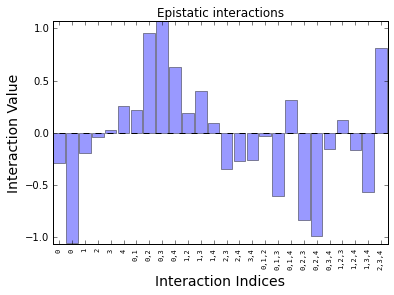

In [12]:
regression_order = 3
epistasis = ProjectedEpistasisModel(seq1, genotypes, phenotypes, regression_order,
                                    errors=errors, log_transform=True)
epistasis.fit()
epistasis.fit_error()
epistasis_bar(epistasis)

# Some comments about the Epistasis Models

The Epistasis models inherit the core `EpistasisMap` object, so you can access all the attributes from that object as well. This enables you to easily map between different properties of the space; for example, map epistatic index to gentype, to their value.